In [2]:
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\siddhartha\AppData\Local\Temp\ipykernel_1028\2512082199.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
gen_sign=[glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
          glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
          glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
          glob.glob('Dataset_Signature_Final/Dataset/dataset4/real/*.*')]

forg_sign=[glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
           glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
           glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
           glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]


In [6]:
def load_images(file_list):
    images=[]
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images

In [7]:
gen_imgs=load_images(gen_sign)
forg_imgs=load_images(forg_sign)


In [8]:
print(gen_imgs[0])

[[[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 251 239]
  [253 251 241]
  [253 252 242]]

 [[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 252 241]
  [253 251 240]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [252 252 244]
  ...
  [253 251 240]
  [253 251 239]
  [253 251 240]]

 ...

 [[252 252 243]
  [253 252 242]
  [253 252 241]
  ...
  [253 252 242]
  [253 252 242]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [253 252 242]
  ...
  [253 252 241]
  [252 252 242]
  [252 252 243]]

 [[253 252 242]
  [252 252 242]
  [253 252 243]
  ...
  [253 251 240]
  [253 251 239]
  [253 252 241]]]


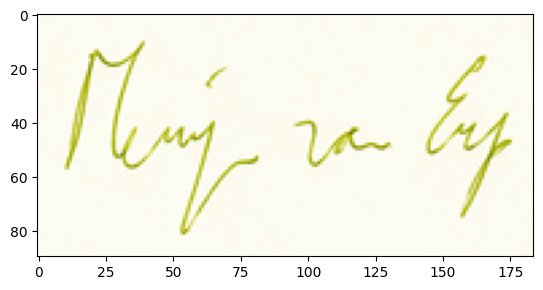

In [9]:
plt.imshow(gen_imgs[1])
plt.show()

In [10]:
gen_imgs[0].shape

(88, 191, 3)

In [8]:
cv2.imshow('Genuin Signature',gen_imgs[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
num_gen=sum([len(x) for x in gen_sign])
num_forg=sum([len(x) for x in forg_sign])
print(f'Number of real signatures:{num_gen}')
print(f'Number of forged signatures:{num_forg}')


Number of real signatures:270
Number of forged signatures:360


In [12]:
gen_shape=[x.shape for x in gen_imgs]
forg_shape=[x.shape for x in forg_imgs]
print('shape for real images:',gen_shape[:5])
print('shape of forged images:',forg_shape[:5])

gen_color=[x.shape[2] for x in gen_imgs]
forg_color=[x.shape[2] for x in forg_imgs]
print('color channels of real images:',gen_color[:5])
print('color channelsof forged images:',forg_color[:5])

gen_pixels =[x.mean() for x in gen_imgs]
forg_pixels =[x.mean()for x in forg_imgs]
print('Mean pixels values of real images:',gen_pixels[:5])
print('mean pixels value of forged images:',forg_pixels[:5])

shape for real images: [(88, 191, 3), (90, 184, 3), (80, 202, 3), (90, 186, 3), (90, 194, 3)]
shape of forged images: [(83, 226, 3), (118, 223, 3), (91, 272, 3), (76, 161, 3), (83, 166, 3)]
color channels of real images: [3, 3, 3, 3, 3]
color channelsof forged images: [3, 3, 3, 3, 3]
Mean pixels values of real images: [242.76453672854197, 243.156038647343, 243.3089315181518, 243.03986459577857, 242.72010309278352]
mean pixels value of forged images: [242.45354870810675, 243.70669605533178, 243.68103587588882, 239.77849515092078, 243.47038757439395]


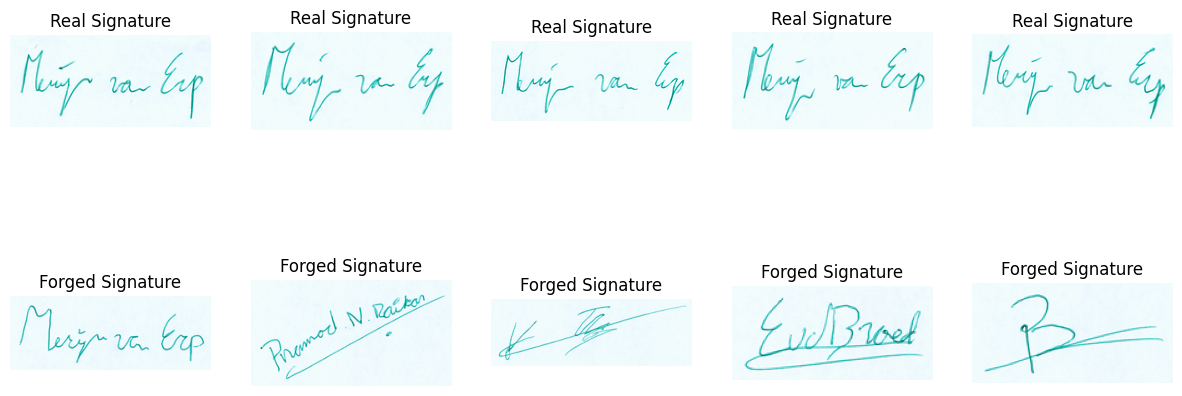

In [17]:
fig,ax = plt.subplots(2,5,figsize = (15,6))
for i in range(5):
    ax[0,i].imshow(cv2.cvtColor(gen_imgs[i],cv2.COLOR_BGR2RGB))
    ax[0,i].set_title('Real Signature')
    ax[0,i].axis('off')
    ax[1,i].imshow(cv2.cvtColor(forg_imgs[i],cv2.COLOR_BGR2RGB))
    ax[1,i].set_title('Forged Signature')
    ax[1,i].axis('off')
plt.show()

 

In [18]:
image_data=pd.DataFrame(columns=['Type','Shape','Color Channels', 'Mean Pixel value'])

In [20]:
data_list=[]
for i in range(len(gen_shape)):
    data_list.append({'Type':'Real',
                      'Shape':gen_shape[i],
                      'Color Channels':gen_color[i],
                      'Mean pixel Value': gen_pixels[i]})

In [21]:
for i in range(len(forg_shape)):
    data_list.append({'Type':'Forged',
                      'Shape':forg_shape[i],
                      'Color Channels': forg_color[i],
                      'Mean Pixel Value':forg_pixels[i]})
    
image_data=pd.concat([image_data,pd.DataFrame(data_list)],ignore_index=True)

In [22]:
image_data.head()

,Type,Shape,Color Channels,Mean Pixel value,Mean pixel Value,Mean Pixel Value
0,Real,"(88, 191, 3)",3,NaN,242.764537,NaN
1,Real,"(90, 184, 3)",3,NaN,243.156039,NaN
2,Real,"(80, 202, 3)",3,NaN,243.308932,NaN
3,Real,"(90, 186, 3)",3,NaN,243.039865,NaN
4,Real,"(90, 194, 3)",3,NaN,242.720103,NaN


In [23]:
image_data.tail()

,Type,Shape,Color Channels,Mean Pixel value,Mean pixel Value,Mean Pixel Value
625,Forged,"(382, 1010, 3)",3,NaN,NaN,240.179306
626,Forged,"(532, 1552, 3)",3,NaN,NaN,243.524036
627,Forged,"(386, 1023, 3)",3,NaN,NaN,240.151832
628,Forged,"(571, 1402, 3)",3,NaN,NaN,243.676428
629,Forged,"(336, 965, 3)",3,NaN,NaN,238.301999


In [24]:
image_data.shape

(630, 6)

In [25]:
print(image_data.describe())

       Mean pixel Value  Mean Pixel Value
count        270.000000        360.000000
mean         244.814474        242.878048
std            4.703930          5.071013
min          233.836949        231.164579
25%          242.218582        239.813222
50%          243.956509        242.133317
75%          250.078255        247.612565
max          252.423212        252.318956


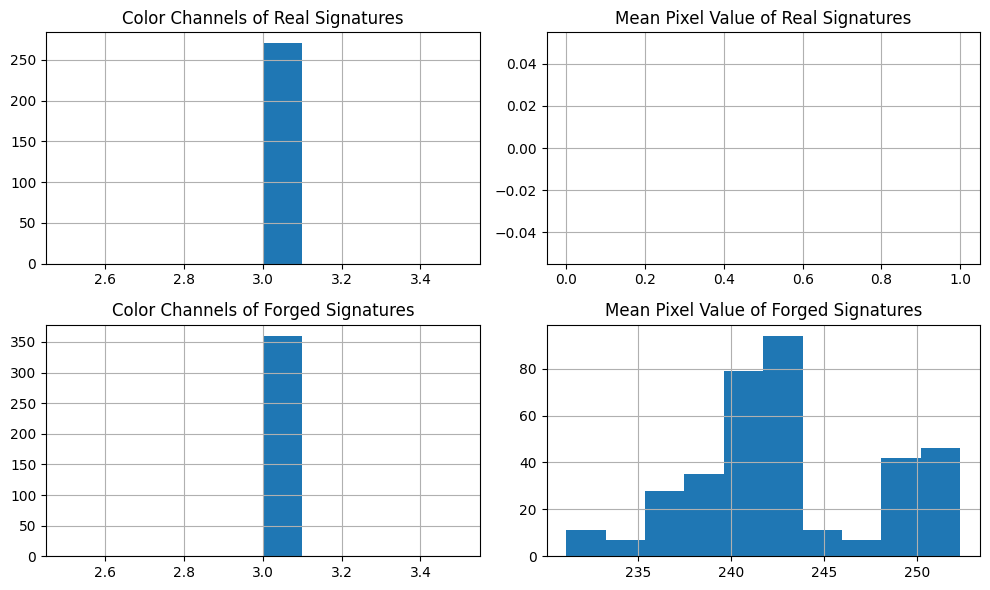

In [30]:
fig, ax=plt.subplots (2,2, figsize=(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data ['Type']=='Forged']['Color Channels'].hist (ax=ax [1,0])
image_data[image_data ['Type']=='Real'] ['Mean Pixel Value'].hist (ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist (ax=ax[1,1])
ax[0,0].set_title('Color Channels of Real Signatures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of Forged Signatures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')
plt.tight_layout()
plt.show()

In [1]:
import tensorflow
from tensorflow import keras
from keras import layers

In [2]:
(train_data,train_labels),(test_data,test_labels)=keras.datasets.mnist.load_data()


In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1],train_data.shape[2]* 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1],test_data.shape[2]* 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

In [5]:
model = keras.Sequential([layers.LSTM(32,input_shape = (train_data.shape[1], train_data.shape[2])),
                          layers.Dense(10,activation='softmax')])

C:\Users\siddhartha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
model.save('rnn_signature_verification_model.h5')

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [10]:
history = model.fit(train_data,train_labels,epochs=10,
                    batch_size=32,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5919 - loss: 1.2411 - val_accuracy: 0.9157 - val_loss: 0.2853
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9159 - loss: 0.2739 - val_accuracy: 0.9487 - val_loss: 0.1728
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9454 - loss: 0.1789 - val_accuracy: 0.9562 - val_loss: 0.1494
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9579 - loss: 0.1401 - val_accuracy: 0.9616 - val_loss: 0.1251
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9645 - loss: 0.1147 - val_accuracy: 0.9678 - val_loss: 0.1092
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9700 - loss: 0.0980 - val_accuracy: 0.9691 - val_loss: 0.1035
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9730 - loss: 0.0890 - val_accuracy: 0.9759 - val_loss: 0.0847
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9748 - loss: 0.0852 -

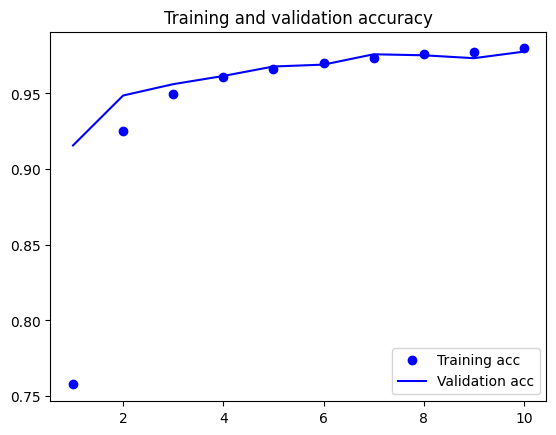

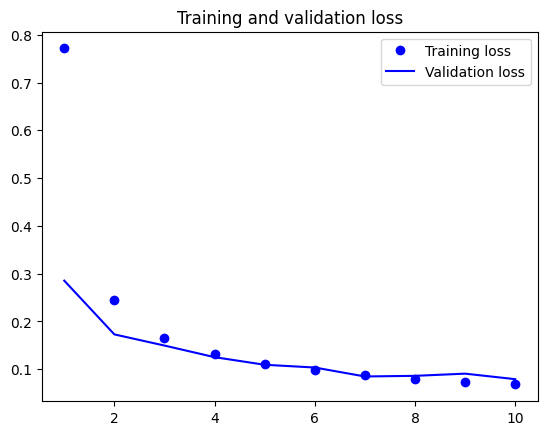

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [14]:
final_loss, final_accuracy = model.evaluate(test_data,test_labels)
print('Final loss:{:.2f}%'.format (final_loss *100))
print('Final accuracy:{:.2f}%'.format (final_accuracy *100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0871
Final loss:7.30%
Final accuracy:97.75%


In [15]:
import cv2
import numpy as np
import glob
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

In [2]:
import cv2
import numpy as np
import glob
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

gen_sign = (glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset4/real/*.*'))



forg_sign =(glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*'))

train_ratio = 0.8
train_gen_sign = gen_sign[:int(len(gen_sign) * train_ratio)]
test_gen_sign = gen_sign[int(len(gen_sign) * train_ratio):]
train_forg_sign = forg_sign[:int(len(forg_sign) * train_ratio)]
test_forg_sign = forg_sign[int(len(forg_sign) * train_ratio):]

train_image_paths = train_gen_sign + train_forg_sign
test_image_paths = test_gen_sign + test_forg_sign

def preprocess_image(image_path, img_size=(128, 128), patch_size=(128,128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
      raise ValueError(f"Failed to load image: {image_path}")
    img = cv2.resize(img, img_size)
    return img_to_patches(img, patch_size)

def img_to_patches(img, patch_size= (256,256)):
  patches = []
  for i in range(0, img.shape[0], patch_size[0]):
    for j in range(0, img.shape[1], patch_size[1]):
      patch = img[i:i+patch_size[0], j:j+patch_size[1]].flatten()
      patches.append(patch)
  return np.array(patches)

def process_images(image_paths, label):
  x_data = []
  y_data = []
  for image_path in image_paths:
    try:
      patches = preprocess_image(image_path)
      x_data.append(patches)
      y_data.append(label)
    except Exception as e:
      print(f"Error processing image {image_path}: {e}")
  return np.array(x_data), np.array(y_data)

x_train_real, y_train_real = process_images(train_gen_sign, label=0)
x_train_forg, y_train_forg = process_images(train_forg_sign,label= 1)


x_test_real, y_test_real = process_images(test_gen_sign, label=0)
x_test_forg, y_test_forg = process_images(test_forg_sign, label=1)

x_train = np.concatenate([x_train_real, x_train_forg], axis=0)
y_train = np.concatenate([y_train_real, y_train_forg], axis=0)

x_test = np.concatenate([x_test_real, x_test_forg], axis=0)
y_test = np.concatenate([y_test_real, y_test_forg], axis=0)

indices =np.random.permutation(len(x_train))
x_train = x_train[indices]
y_train = y_train[indices]

test_indices = np.random.permutation(len(x_test))
x_test = x_test[test_indices]
y_test = y_test[test_indices]

print("x_train Shape: ", x_train.shape)
print("y_train Shape: ", y_train.shape)
print("x_test Shape: ", x_test.shape)
print("y_test Shape: ", y_test.shape)

timesteps = x_train.shape[1] # number of patches per image
features = x_train.shape[2] # number of features per patch

# convert label to categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(timesteps, features)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 classes: genuine and forged
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.save('bi_rnn_signature_verification_model.h5')

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

x_train Shape:  (504, 1, 16384)
y_train Shape:  (504,)
x_test Shape:  (126, 1, 16384)
y_test Shape:  (126,)


C:\Users\siddhartha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │     8,421,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,430,274 (32.16 MB)

 Trainable params: 8,430,274 (32.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.5676 - loss: 0.8136 - val_accuracy: 0.5714 - val_loss: 0.6835
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.5775 - loss: 0.6830 - val_accuracy: 0.5714 - val_loss: 0.6835
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.5439 - loss: 0.6950 - val_accuracy: 0.5714 - val_loss: 0.6857
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5648 - loss: 0.6871 - val_accuracy: 0.5714 - val_loss: 0.6854
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.5410 - loss: 0.6888 - val_accuracy: 0.5714 - val_loss: 0.6871
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5746 - loss: 0.6849 - val_accuracy: 0.5714 - val_loss: 0.6846
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5850 - loss: 0.6812 - val_accuracy: 0.5714 - val_loss: 0.6837
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5820 - loss: 0.6802 - val_accuracy: 0.